Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def evaluate_model(classifier_name):
    print("Accuracy Score: ", accuracy_score(y_test, classifier_name.predict(X_test)))
    print("Precision Score: ", precision_score(y_test, classifier_name.predict(X_test)))
    print("Recall Score: ", recall_score(y_test, classifier_name.predict(X_test)))
    print("F1 Score: ", f1_score(y_test, classifier_name.predict(X_test)))

Upload datasets and Pre-process dataset

* This takes a lot of time because of datasets' size. To implement this program please go to "Start Here" and upload dataset and check!

In [ ]:
#Read data and change column names (originally written in Korean)
hp_data1 = pd.read_csv("HP_T20_2020_1.CSV",encoding= 'unicode_escape')
hp_data1.columns=['Year','Patient_ID','Diagnosis_ID','Sex_ID','Age_Code','City_Code','Start_Date'
                 ,'Format_Code','Diagnosis_ID','Main_Disease_Code','Sub_Disease_Code','DayCare_Code'
                 ,'Hospitalization_Code','Trial_Decision_Addition_Rate','Total_Cost_of_MedicalCare_Benefit'
                 ,'Trial_Decision_Self_Pay','Trial_Decision_Insurer_Contribution','Total_Number_of_Days_of_Prescription',
                 'DB_date']

hp_data2 = pd.read_csv("HP_T20_2020_2.CSV",encoding= 'unicode_escape')
hp_data2.columns=['Year','Patient_ID','Diagnosis_ID','Sex_ID','Age_Code','City_Code','Start_Date'
                 ,'Format_Code','Diagnosis_ID','Main_Disease_Code','Sub_Disease_Code','DayCare_Code'
                 ,'Hospitalization_Code','Trial_Decision_Addition_Rate','Total_Cost_of_MedicalCare_Benefit'
                 ,'Trial_Decision_Self_Pay','Trial_Decision_Insurer_Contribution','Total_Number_of_Days_of_Prescription',
                 'DB_date']

hp_data3 = pd.read_csv("HP_T20_2020_3.CSV",encoding= 'unicode_escape')
hp_data3.columns=['Year','Patient_ID','Diagnosis_ID','Sex_ID','Age_Code','City_Code','Start_Date'
                 ,'Format_Code','Diagnosis_ID','Main_Disease_Code','Sub_Disease_Code','DayCare_Code'
                 ,'Hospitalization_Code','Trial_Decision_Addition_Rate','Total_Cost_of_MedicalCare_Benefit'
                 ,'Trial_Decision_Self_Pay','Trial_Decision_Insurer_Contribution','Total_Number_of_Days_of_Prescription',
                 'DB_date']

examination_data = pd.read_csv("HP_Health_Examination.CSV",encoding= 'unicode_escape')
examination_data.columns=['Year','Patient_ID','City_Code','Sex_ID', 'Age_Code',
                         'Height_Per5Cm','Weight_Per5Cm','Waist','Sight_Left','Sight_Right',
                         'Hearing_Left','Hearing_Right','Systolic_Blood_Pressure','Diastolic_Blood_Pressure',
                         'Fasting_Blood_Sugar','Total_Cholesterol','Triglycerides','HDL_Cholesterol','LDL_Cholesterol',
                         'Hemoglobin','Urine_Protein','Serum_Creatinine','AST','ALT','Gamma_GTP','Smoking_Status',
                         'Drinking_Status','Check_for_Oral_Examination','Presence_Dental_Caries','Tartar','DB_Release_date']

In [ ]:
hp_total = pd.concat([hp_data1, hp_data2, hp_data3])
all_combined = pd.merge(hp_total, examination_data, on="Patient_ID")

In [ ]:
all_data = all_combined[['Main_Disease_Code','Patient_ID','Sex_ID_x', 'Age_Code_x',
                         'Height_Per5Cm','Weight_Per5Cm','Waist','Sight_Left','Sight_Right',
                         'Hearing_Left','Hearing_Right','Systolic_Blood_Pressure','Diastolic_Blood_Pressure',
                         'Fasting_Blood_Sugar','Total_Cholesterol','Triglycerides','HDL_Cholesterol','LDL_Cholesterol',
                         'Hemoglobin','Urine_Protein','Serum_Creatinine','AST','ALT','Gamma_GTP','Smoking_Status',
                         'Drinking_Status']]

In [ ]:
all_data.drop_duplicates()
all_data.dropna()

,Unnamed: 0,Main_Disease_Code,Patient_ID,Sex_ID_x,Age_Code_x,Height_Per5Cm,Weight_Per5Cm,Waist,Sight_Left,Sight_Right,...,HDL_Cholesterol,LDL_Cholesterol,Hemoglobin,Urine_Protein,Serum_Creatinine,AST,ALT,Gamma_GTP,Smoking_Status,Drinking_Status
0,35,I109,2406,2,17,145,55,88.0,0.5,0.4,...,32.0,100.0,12.7,1.0,0.6,16.0,26.0,21.0,1.0,0.0
1,36,K294,2406,2,17,145,55,88.0,0.5,0.4,...,32.0,100.0,12.7,1.0,0.6,16.0,26.0,21.0,1.0,0.0
2,48,M170,2406,2,17,145,55,88.0,0.5,0.4,...,32.0,100.0,12.7,1.0,0.6,16.0,26.0,21.0,1.0,0.0
3,49,M5448,2406,2,17,145,55,88.0,0.5,0.4,...,32.0,100.0,12.7,1.0,0.6,16.0,26.0,21.0,1.0,0.0
4,52,H521,2406,2,17,145,55,88.0,0.5,0.4,...,32.0,100.0,12.7,1.0,0.6,16.0,26.0,21.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735177,11727237,S5260,905675,2,3,170,65,84.0,1.0,1.0,...,48.0,108.0,15.2,1.0,1.1,41.0,32.0,21.0,3.0,0.0
1735178,11727240,S9349,938629,2,3,175,70,86.0,1.0,1.2,...,49.0,130.0,16.1,1.0,0.7,20.0,26.0,16.0,1.0,0.0
1735179,11727241,S903,941590,1,3,165,70,86.2,0.9,1.0,...,36.0,131.0,15.2,1.0,0.9,40.0,63.0,69.0,2.0,1.0
1735180,11727243,A099,948330,1,3,160,50,70.8,0.6,0.4,...,61.0,178.0,13.0,1.0,1.0,44.0,42.0,21.0,3.0,1.0


* Start Here !!!!!!

In [3]:
all_data = pd.read_csv("all_data.csv")

Additional pre-processing part

In [4]:
high_blood_pressure = all_data[all_data['Main_Disease_Code']=="I109"]
list1 = high_blood_pressure['Patient_ID'].drop_duplicates()
not_high_blood =  all_data[all_data['Main_Disease_Code']!="I109"]
not_high_blood = not_high_blood[~not_high_blood['Patient_ID'].isin(list1)]
not_high_blood = not_high_blood.drop(['Unnamed: 0','Main_Disease_Code'], axis=1)
high_blood_pressure= high_blood_pressure.drop(['Unnamed: 0','Main_Disease_Code'], axis=1)

Assgin Class labels (Positive, Negative)

In [5]:
not_high_blood['Class']=0
high_blood_pressure['Class'] = 1 

In [6]:
not_high_blood = not_high_blood.drop_duplicates()
not_high_blood = not_high_blood.sample(len(high_blood_pressure), random_state =42)
total_data = pd.concat([not_high_blood,high_blood_pressure ])

Train, Test Split

In [7]:
total_data = total_data.loc[:, ~total_data.columns.isin(['Patient_ID','Systolic_Blood_Pressure','Diastolic_Blood_Pressure','Fasting_Blood_Sugar']) ]
X, y = total_data.drop('Class', axis=1), total_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=42, stratify=y)

ML models without hyperparameter tunings

In [22]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
evaluate_model(sgd_model)

Accuracy Score:  0.555939746662102
Precision Score:  0.7911617961511048
Recall Score:  0.15200273878808626
F1 Score:  0.2550111998162082


In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
evaluate_model(knn_model)

Accuracy Score:  0.6000684697021568
Precision Score:  0.5931663160578823
Recall Score:  0.6371105785689832
F1 Score:  0.6143536247193979


In [19]:
dctree_model = DecisionTreeClassifier()
dctree_model.fit(X_train, y_train)
evaluate_model(dctree_model)

Accuracy Score:  0.6652173913043479
Precision Score:  0.6690960056061668
Recall Score:  0.6537487161930846
F1 Score:  0.6613333333333333


In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model)

Accuracy Score:  0.7515234508729887
Precision Score:  0.7109873068749641
Recall Score:  0.8475864429989729
F1 Score:  0.7733008495752124


In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
evaluate_model(lr_model)

Accuracy Score:  0.7518657993837726
Precision Score:  0.7324486571879937
Recall Score:  0.793632317699418
F1 Score:  0.7618139993427538


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
evaluate_model(svm_model)

Accuracy Score:  0.7547415268743581
Precision Score:  0.7049523494739162
Recall Score:  0.8762067785005135
F1 Score:  0.7813053299957262


In [21]:
rftree_model = RandomForestClassifier()
rftree_model.fit(X_train, y_train)
evaluate_model(rftree_model)

Accuracy Score:  0.7565217391304347
Precision Score:  0.7098056784454275
Recall Score:  0.8678534748373845
F1 Score:  0.7809130675867169


** Demo

In [10]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model)

Accuracy Score:  0.7621362547072921
Precision Score:  0.7111576857316199
Recall Score:  0.8828483396097226
F1 Score:  0.7877565982404691


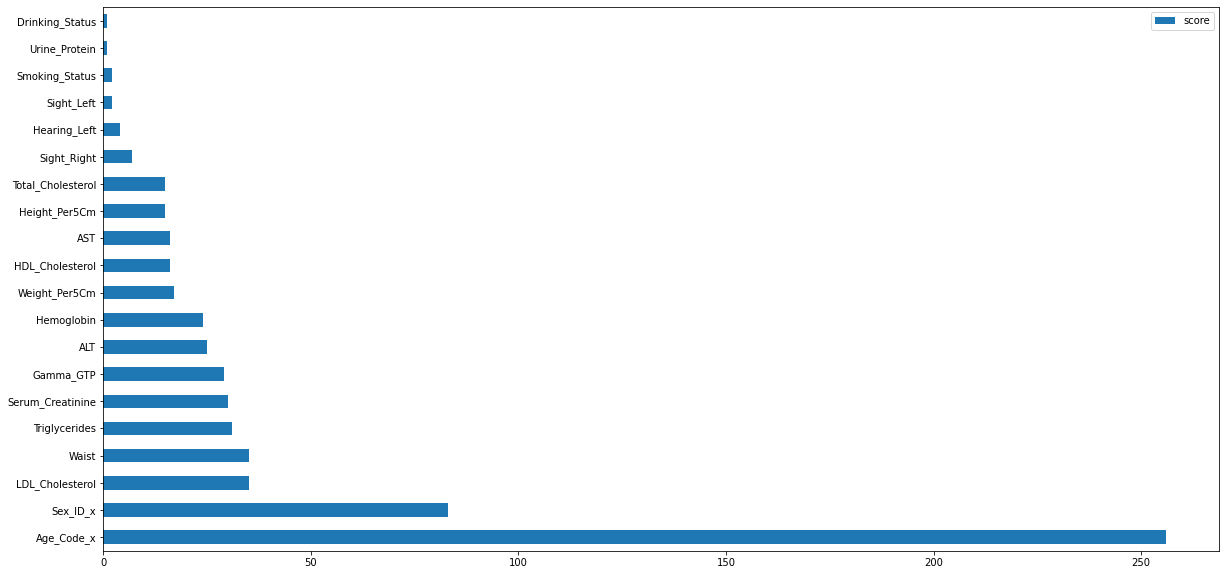

In [11]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) 

ML models with hyperparameter tunings

In [26]:
svm_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(svm.SVC(), svm_grid, refit = True, verbose = 3, cv=3)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
print(svm_grid.best_estimator_)
evaluate_model(svm_best)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 3.3min
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 3.2min
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 3.3min
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time= 4.0min
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time= 4.0min
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time= 4.0min
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.508 total time= 4.2min
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time= 4.1min
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.570 total time= 4.2min
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time= 3.4min
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time= 3.4min
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;,

In [27]:
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 30)
knn_grid  = dict(metric=metrics, n_neighbors=neighbors)
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, knn_grid, cv=3, scoring='accuracy', refit=True)
knn_search.fit(X_train, y_train)
knn_search_best = knn_search.best_estimator_
print(knn_search.best_estimator_)
evaluate_model(knn_search_best)

KNeighborsClassifier(metric='manhattan', n_neighbors=29)
Accuracy Score:  0.6708661417322834
Precision Score:  0.6465785609397944
Recall Score:  0.7537144813420061
F1 Score:  0.6960480556433765


In [28]:
nb_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_search = GridSearchCV(estimator=GaussianNB(), param_grid=nb_grid, verbose=1, cv=3, n_jobs=-1)
nb_search.fit(X_train, y_train)
nb_best = nb_search.best_estimator_
print(nb_search.best_estimator_)
evaluate_model(nb_best)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
GaussianNB(var_smoothing=0.0002310129700083158)
Accuracy Score:  0.7542622389592605
Precision Score:  0.7061795569374272
Recall Score:  0.8708661417322835
F1 Score:  0.7799239636987982


In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_
print(rf_random.best_estimator_)
evaluate_model(rf_best)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000)
Accuracy Score:  0.7590893529613146
Precision Score:  0.703989218328841
Recall Score:  0.894145840465594
F1 Score:  0.7877544865027899


In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_search = GridSearchCV(estimator=dt, 
                           param_grid=dt_params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_search.fit(X_train, y_train)
print(dt_search.best_estimator_)
dt_best = dt_search.best_estimator_
evaluate_model(dt_best)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)
Accuracy Score:  0.7619308456008216
Precision Score:  0.7121859226801265
Recall Score:  0.8791509756932557
F1 Score:  0.7869093583379297


In [8]:
xgb_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
    }

xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_
print(xgb_random.best_estimator_)
evaluate_model(xgb_best)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
XGBClassifier(learning_rate=0.05, min_child_weight=3)
Accuracy Score:  0.7620335501540568
Precision Score:  0.7109702315325248
Recall Score:  0.8830537487161931
F1 Score:  0.7877233165368759


In [9]:
params_sgd = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}
sgd = SGDClassifier(max_iter=1000)
sgd_search = GridSearchCV(sgd, param_grid=params_sgd, cv=3)
sgd_search.fit(X_train, y_train)
print(sgd_search.best_params_) 
sgd_best = sgd_search.best_estimator_
evaluate_model(sgd_best)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

{'alpha': 0.1, 'loss': 'log', 'penalty': 'elasticnet'}
Accuracy Score:  0.7487846627867168
Precision Score:  0.7373440459860213
Recall Score:  0.772885997945909
F1 Score:  0.754696797486127
